# Introduction/Business Problem

![Montreal Downtown](http://images.dailyhive.com/20180821110913/Montreal-Skyline.jpg)
*Downtown Montreal. Image obtained from [this link](http://images.dailyhive.com/20180821110913/Montreal-Skyline.jpg)*

### Background


> As the largest city in Quebec Canada, Montreal offers great opportunities for students planning to study in an university.  Montreal has more than five universities, so every year, there are a large number of students looking for an apartment to rent. However, it is always a struggle for students to select the most suitable neighborhood to rent an apartment. There are numerous factors to consider, such as commmute time, distance to grocery store and metro, neighbourhood safety, and of course rental price.

### Problem Definition
> The objective of this project is to help university students in Montreal find a neighbourhood that fits their academic and social life.




# Data

### Census Profile of Montreal City, 2016
> Obtained from Statistics Canada [here](https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=CSD&Code1=2466023&Geo2=PR&Code2=24&SearchText=Montreal&SearchType=Begins&SearchPR=01&B1=All&GeoLevel=PR&GeoCode=2466023&TABID=1&type=0). It is a collection of .xls files, with a huge variety of census data for each neighbourhood of Montreal.
> After data cleaning on this set of files, we will obtain the following data for each neighbourhood: 
* Number of Rental Properties as column "Rental"
* Population Density as column "Density"
* Average Income as column "Income"






In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/emilywzhang/Coursera_Capstone/main/Montreal_Census_2016_0.XLS'
xls = pd.ExcelFile(url)


In [48]:
# Dataframes from the relevant excel sheets
df_rental = pd.read_excel(xls, '06A_Ménages mode occupation', index_col=0, header=2)
df_popul = pd.read_excel(xls, '01_Population, Densité', index_col=0, header=2)
df_inc = pd.read_excel(xls, '13A_Revenu avant impôt 15+', index_col=0, header=2)


In [71]:
df = pd.concat([df_rental['Locataire'], df_popul['Densité'], df_inc['Revenu moyen ($)']], axis=1, ignore_index = )
df = df.rename(columns={"Locataire": "Rental", "Densité": "Density", "Revenu moyen ($)":"Income"})

df.drop(['AGGLOMÉRATION DE MONTRÉAL', 'Ville de Montréal', 'Autres villes','L\'Île-Dorval'],inplace=True)
df.dropna(inplace=True)
df


,Rental,Density,Income
Ahuntsic-Cartierville,35850,5556.498344,40602
Anjou,10470,3128.362573,39208
Côte-des-Neiges–Notre-Dame-de-Grâce,54995,7766.791045,38937
Lachine,11415,2510.665914,40620
LaSalle,19990,4723.601721,35379
Le Plateau-Mont-Royal,41065,12792.127921,43128
Le Sud-Ouest,25975,4984.119898,40881
L'Île-Bizard–Sainte-Geneviève,1800,780.211864,56173
Mercier–Hochelaga-Maisonneuve,43935,5353.168044,36709
Montréal-Nord,25080,7622.986425,28820


### Coordinates Data from GeoPy 
> For each neighbourhood of Montreal, we gather the geographical coordinates using the Nominatim API from *geopy.geoencoders*.




In [61]:
%pip install geopy
from geopy.geocoders import Nominatim

In [72]:
geolocator = Nominatim(user_agent="mtl_explorer")
coordinates = [geolocator.geocode("{} Montreal QC".format(i)) for i in df.index]
latitudes = [i.latitude for i in coordinates]
longitudes = [i.longitude for i in coordinates]
df['Latitude'] = latitudes
df['Longitude'] = longitudes
df.head()

,Rental,Density,Income,Latitude,Longitude
Ahuntsic-Cartierville,35850,5556.498344,40602,45.541892,-73.680319
Anjou,10470,3128.362573,39208,45.604898,-73.546672
Côte-des-Neiges–Notre-Dame-de-Grâce,54995,7766.791045,38937,45.483609,-73.626970
Lachine,11415,2510.665914,40620,45.448676,-73.711204
LaSalle,19990,4723.601721,35379,45.432514,-73.629267


In [82]:
df.columns.name = 'Neighbourhood'
df.head()


Neighbourhood,Rental,Density,Income,Latitude,Longitude
Ahuntsic-Cartierville,35850,5556.498344,40602,45.541892,-73.680319
Anjou,10470,3128.362573,39208,45.604898,-73.546672
Côte-des-Neiges–Notre-Dame-de-Grâce,54995,7766.791045,38937,45.483609,-73.626970
Lachine,11415,2510.665914,40620,45.448676,-73.711204
LaSalle,19990,4723.601721,35379,45.432514,-73.629267


### Venue Data from Foursquare API
> From their collection of venue data, we will gather information on grocery stores, metro stations, restaurants and parks in Montreal. The following are the IDs retrieved from Foursquare API [Documentation](https://developer.foursquare.com/docs/build-with-foursquare/categories/), for the venue categories we are interested in.
* Metro station ID: 4bf58dd8d48988d1fd931735
* Grocery store ID: 4bf58dd8d48988d118951735
* Park ID: 4bf58dd8d48988d163941735
* Restaurant(Food) ID: 4d4b7105d754a06374d81259

In [68]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

mtl = geolocator.geocode("Montreal QC")
mtl_lat = mtl.latitude
mtl_log = mtl.longitude


In [ ]:
# create map of Mtl using latitude and longitude values
map_mtl = folium.Map(location=[mtl_lat, mtl_log], zoom_start=10)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df.index):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mtl)  
    
map_mtl

# Methodology

### Visualization of the geographical distributions




In [83]:
CLIENT_ID = 'PPWYTNKLMKQHHOVZVU5ESQYUP4Q55CRMIXUONUEGN5LGYOX2' # your Foursquare ID
CLIENT_SECRET = 'JBGGASHHSPXVDKUWBU5KFEWCUKSZQVGJHAH4RZDVQ5U4T4QG' # your Foursquare Secret
VERSION = '20190425' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
df['Neighbourhood'] = df.index.to_list()

In [97]:
def getNearbyVenue(names, latitudes, longitudes, categoryid, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            categoryid, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

> Now we can generate the Montreal map, with parks, restuarants, metro stations, grocery stores marked on it.

In [123]:
mtl_park = getNearbyVenue(names=df.index.tolist(),
                                   latitudes=df['Latitude'], categoryid="4bf58dd8d48988d163941735",
                                   longitudes=df['Longitude']
                                  )
mtl_groc = getNearbyVenue(names=df.index.tolist(),
                                   latitudes=df['Latitude'], categoryid="4bf58dd8d48988d118951735",
                                   longitudes=df['Longitude']
                                  )
mtl_rest = getNearbyVenue(names=df.index.tolist(),
                                   latitudes=df['Latitude'], categoryid="4d4b7105d754a06374d81259",
                                   longitudes=df['Longitude']
                                  )
mtl_metr = getNearbyVenue(names=df.index.tolist(),
                                   latitudes=df['Latitude'], categoryid="4bf58dd8d48988d1fd931735",
                                   longitudes=df['Longitude']
                                  )

> Now we can view the markers on the map of Montreal, to identify how many venues of interest there are in each neighbourhood.

In [125]:
map_mtl = folium.Map(location=[mtl_lat, mtl_log], zoom_start=10)

geo = "https://raw.githubusercontent.com/emilywzhang/Coursera_Capstone/main/limadmin.geojson.json"
folium.GeoJson(geo, name="geojson").add_to(map_mtl)

# add 'Park' markers to map
for lat, lng, label in zip(mtl_park['Venue Latitude'], mtl_park['Venue Longitude'], mtl_park['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='orange',
        fill=False,
        parse_html=False).add_to(map_mtl)  

# add 'Restaurant' markers to map
for lat, lng, label in zip(mtl_rest['Venue Latitude'], mtl_rest['Venue Longitude'], mtl_rest['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='darkgreen',
        fill=False,
        parse_html=False).add_to(map_mtl)  

# add 'Grocery Store' markers to map
for lat, lng, label in zip(mtl_groc['Venue Latitude'], mtl_groc['Venue Longitude'], mtl_groc['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='purple',
        fill=False,
        parse_html=False).add_to(map_mtl)  

# add 'Metro stations' markers to map
for lat, lng, label in zip(mtl_metr['Venue Latitude'], mtl_metr['Venue Longitude'], mtl_metr['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='yellow',
        fill=False,
        parse_html=False).add_to(map_mtl)  
    
map_mtl

### Clustering

In [130]:
park_count = mtl_park.groupby('Neighbourhood').count()
rest_count = mtl_rest.groupby('Neighbourhood').count()
groc_count = mtl_groc.groupby('Neighbourhood').count()
metr_count = mtl_metr.groupby('Neighbourhood').count()

In [195]:
# create a new df for clustering
cluster = (pd.concat([df['Neighbourhood'],df['Income'],df['Rental'],df['Density']],axis=1)).reset_index(drop=True)
n_list = df['Neighbourhood'].to_list()
p_list = [0]*33
r_list = [0]*33
g_list = [0]*33
m_list = [0]*33

In [196]:
for i in n_list:
  if i in park_count.index.values:
    c = n_list.index(i)
    p_list[c] = park_count.loc[i,'Venue']
  if i in rest_count.index.values:
    c = n_list.index(i)
    r_list[c] = rest_count.loc[i,'Venue']
  if i in groc_count.index.values:
    c = n_list.index(i)
    g_list[c] = groc_count.loc[i,'Venue']
  if i in metr_count.index.values:
    c = n_list.index(i)
    m_list[c] = metr_count.loc[i,'Venue']

In [197]:
cluster['Park'] = p_list
cluster['Restaurant'] = r_list
cluster['Metro'] = m_list
cluster['Grocery'] = g_list

In [198]:
cluster

,Neighbourhood,Income,Rental,Density,Park,Restaurant,Metro,Grocery
0,Ahuntsic-Cartierville,40602,35850,5556.498344,1,5,0,0
1,Anjou,39208,10470,3128.362573,0,3,1,1
2,Côte-des-Neiges–Notre-Dame-de-Grâce,38937,54995,7766.791045,0,23,2,4
3,Lachine,40620,11415,2510.665914,0,1,0,0
4,LaSalle,35379,19990,4723.601721,0,17,1,2
5,Le Plateau-Mont-Royal,43128,41065,12792.127921,6,73,1,3
6,Le Sud-Ouest,40881,25975,4984.119898,0,5,0,1
7,L'Île-Bizard–Sainte-Geneviève,56173,1800,780.211864,0,0,0,0
8,Mercier–Hochelaga-Maisonneuve,36709,43935,5353.168044,0,0,0,1
9,Montréal-Nord,28820,25080,7622.986425,0,2,0,0


In [199]:
# set number of clusters
kclusters = 5

new_clus = cluster.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(new_clus)

cluster['Cluster'] = kmeans.labels_

In [200]:
cluster

,Neighbourhood,Income,Rental,Density,Park,Restaurant,Metro,Grocery,Cluster
0,Ahuntsic-Cartierville,40602,35850,5556.498344,1,5,0,0,4
1,Anjou,39208,10470,3128.362573,0,3,1,1,1
2,Côte-des-Neiges–Notre-Dame-de-Grâce,38937,54995,7766.791045,0,23,2,4,4
3,Lachine,40620,11415,2510.665914,0,1,0,0,1
4,LaSalle,35379,19990,4723.601721,0,17,1,2,1
5,Le Plateau-Mont-Royal,43128,41065,12792.127921,6,73,1,3,4
6,Le Sud-Ouest,40881,25975,4984.119898,0,5,0,1,1
7,L'Île-Bizard–Sainte-Geneviève,56173,1800,780.211864,0,0,0,0,3
8,Mercier–Hochelaga-Maisonneuve,36709,43935,5353.168044,0,0,0,1,4
9,Montréal-Nord,28820,25080,7622.986425,0,2,0,0,1


In [201]:
import numpy as np
# create map
map_clusters = folium.Map(location=[mtl_lat, mtl_log], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, c in zip(df['Latitude'], df['Longitude'], cluster['Neighbourhood'], cluster['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[c-1],
        fill=True,
        fill_color=rainbow[c-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [202]:
cluster

,Neighbourhood,Income,Rental,Density,Park,Restaurant,Metro,Grocery,Cluster
0,Ahuntsic-Cartierville,40602,35850,5556.498344,1,5,0,0,4
1,Anjou,39208,10470,3128.362573,0,3,1,1,1
2,Côte-des-Neiges–Notre-Dame-de-Grâce,38937,54995,7766.791045,0,23,2,4,4
3,Lachine,40620,11415,2510.665914,0,1,0,0,1
4,LaSalle,35379,19990,4723.601721,0,17,1,2,1
5,Le Plateau-Mont-Royal,43128,41065,12792.127921,6,73,1,3,4
6,Le Sud-Ouest,40881,25975,4984.119898,0,5,0,1,1
7,L'Île-Bizard–Sainte-Geneviève,56173,1800,780.211864,0,0,0,0,3
8,Mercier–Hochelaga-Maisonneuve,36709,43935,5353.168044,0,0,0,1,4
9,Montréal-Nord,28820,25080,7622.986425,0,2,0,0,1


In [223]:
cluster['Income'] = cluster['Income'].astype('int')
cluster['Rental'] = cluster['Rental'].astype('int')

gg = cluster[['Rental','Income','Density','Cluster']].groupby(['Cluster']).mean()


In [224]:
gg

,Rental,Income,Density
Cluster,,,
0,4115.000000,162473.000000,5055.251369
1,16135.909091,38632.727273,3964.145894
2,1241.428571,92232.428571,2699.169935
3,3002.142857,52760.285714,1974.116431
4,44402.142857,39910.285714,7770.982268


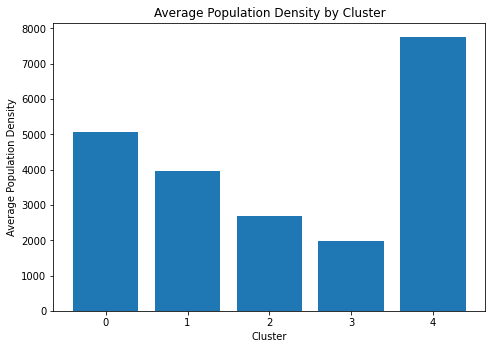

In [226]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1', '2', '3', '4']
students = gg['Density']
ax.bar(langs,students)
ax.set_ylabel('Average Population Density')
ax.set_xlabel('Cluster')
ax.set_title('Average Population Density by Cluster')
plt.show()

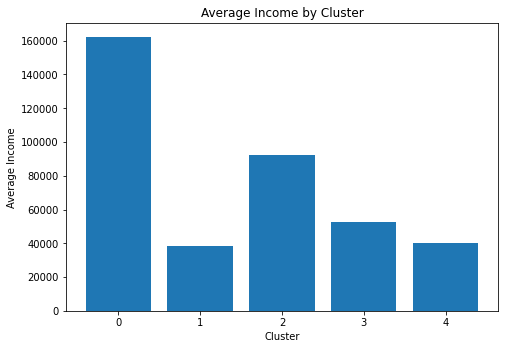

In [227]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1', '2', '3', '4']
students = gg['Income']
ax.bar(langs,students)
ax.set_ylabel('Average Income')
ax.set_xlabel('Cluster')
ax.set_title('Average Income by Cluster')
plt.show()

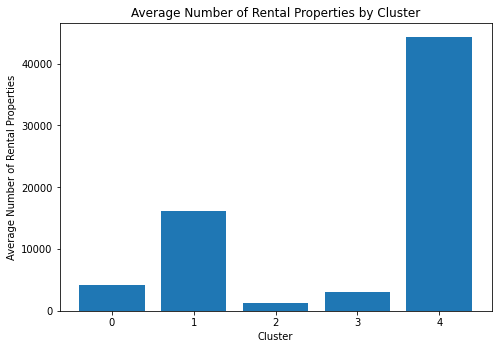

In [228]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1', '2', '3', '4']
students = gg['Rental']
ax.bar(langs,students)
ax.set_ylabel('Average Number of Rental Properties')
ax.set_xlabel('Cluster')
ax.set_title('Average Number of Rental Properties by Cluster')
plt.show()